In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

In [3]:
df = pd.read_csv('../data/cleaned/encoded.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'pitch_id', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'batter', 'pitcher', 'zone', 'stand', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'outs_when_up',
       'inning', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'estimated_ba_using_speedangle', 'pitch_number',
       'spin_axis', 'bat_win_exp', 'n_priorpa_thisgame_player_at_bat',
       'batter_days_since_prev_game', 'api_break_z_with_gravity',
       'api_break_x_arm', 'api_break_x_batter_in', 'outcome',
       'pitch_name_4-Seam Fastball', 'pitch_name_Changeup',
       'pitch_name_Curveball', 'pitch_name_Cutter', 'pitch_name_Knuckle Curve',
       'pitch_name_Sinker', 'pitch_name_Slider', 'pitch_name_Split-Finger',
       'pitch_name_Sweeper', 'Batter Side', 'on_1st', 'on_2nd', 'on_3rd',
       'Pitcher Side'],
      dtype='object')

In [5]:
description_map = {0: 'Ball', 1: 'Called Strike', 2: 'Swinging Strike', 3: 'Hit into Play', 4: 'Hit into Play' }

df['description'] = df['outcome'].map(description_map)

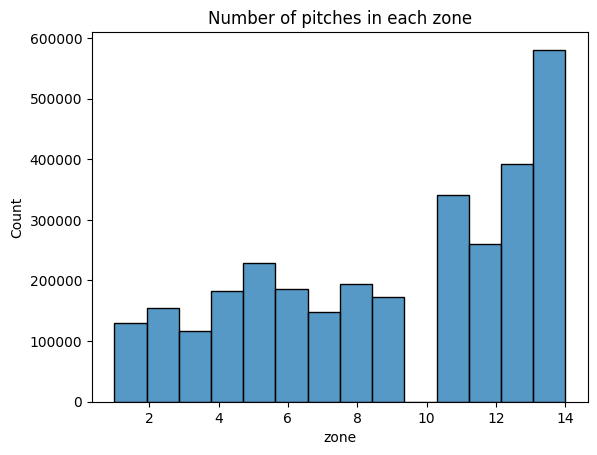

In [6]:
sns.histplot(df["zone"], bins=14, kde=False)
plt.title("Number of pitches in each zone")
plt.show()

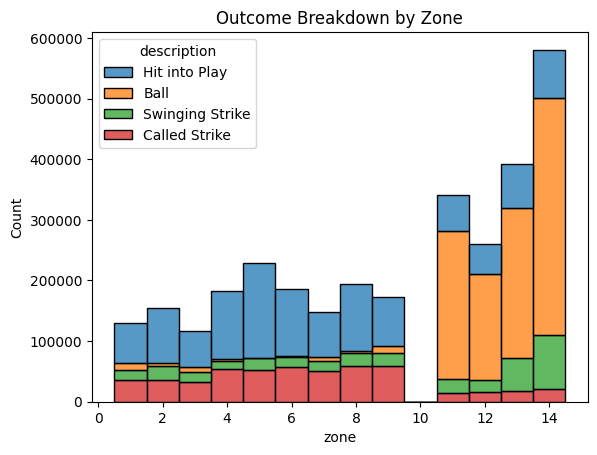

In [7]:
sns.histplot(data=df, x="zone", hue="description", multiple="stack", discrete=True)

plt.title("Outcome Breakdown by Zone")
plt.show()

In [8]:
df["Swinging"] = df["description"].isin(["Hit into Play", "Swiging Strike"])

In [9]:
df = df[df["strikes"] != 3]

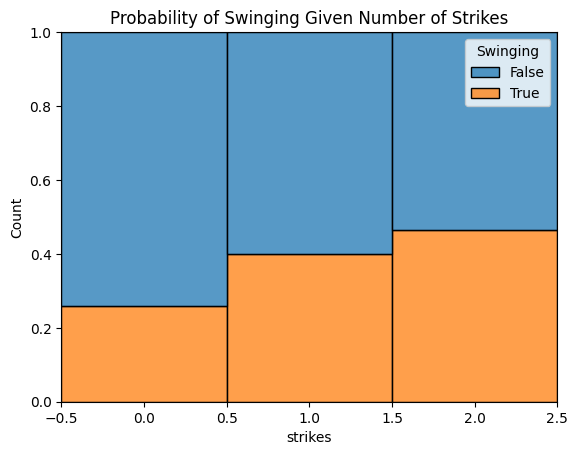

In [10]:
sns.histplot(data=df, x="strikes",
    hue="Swinging",
    discrete=True,
    multiple="fill",
    stat="count")

plt.title("Probability of Swinging Given Number of Strikes")
plt.show()

In [22]:
df[df["pitch_name_4-Seam Fastball"]].describe().T.head(30)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1035734.0,1.518771e+06,899283.172161,0.000000,732834.250000,1.499792e+06,2.298906e+06,3.109431e+06
pitch_id,1035734.0,2.115480e+03,1260.369631,0.000000,1046.000000,2.057000e+03,3.138000e+03,5.633000e+03
release_speed,1035726.0,9.395180e+01,2.534654,59.200000,92.400000,9.400000e+01,9.560000e+01,1.055000e+02
release_pos_x,1035678.0,-7.718616e-01,1.810692,-4.840000,-2.070000,-1.450000e+00,9.400000e-01,4.610000e+00
release_pos_z,1035678.0,5.863143e+00,0.484758,0.870000,5.610000,5.890000e+00,6.170000e+00,7.490000e+00
batter,1035734.0,6.185098e+05,61320.426764,405395.000000,592626.000000,6.418560e+05,6.658280e+05,8.089820e+05
pitcher,1035734.0,6.207874e+05,60349.415373,424144.000000,593958.000000,6.417290e+05,6.661420e+05,8.140050e+05
zone,1035678.0,7.959790e+00,4.264022,1.000000,4.000000,8.000000e+00,1.200000e+01,1.400000e+01
balls,1035734.0,9.404113e-01,1.021491,0.000000,0.000000,1.000000e+00,2.000000e+00,4.000000e+00
strikes,1035734.0,8.708780e-01,0.835665,0.000000,0.000000,1.000000e+00,2.000000e+00,2.000000e+00


In [23]:
df[df["pitch_name_Curveball"]].describe().T.head(30)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,217714.0,1.487219e+06,894164.667245,37.000000,715024.250000,1.446395e+06,2.249978e+06,3.109422e+06
pitch_id,217714.0,1.803959e+03,1207.877695,0.000000,782.000000,1.616000e+03,2.711000e+03,5.614000e+03
release_speed,217713.0,7.881531e+01,3.662180,39.600000,76.600000,7.920000e+01,8.130000e+01,9.230000e+01
release_pos_x,217680.0,-6.759799e-01,1.722067,-5.340000,-1.950000,-1.310000e+00,9.700000e-01,4.640000e+00
release_pos_z,217680.0,5.957917e+00,0.439766,1.870000,5.690000,5.990000e+00,6.240000e+00,7.360000e+00
batter,217714.0,6.184803e+05,60710.333445,405395.000000,592626.000000,6.416800e+05,6.658280e+05,8.089820e+05
pitcher,217714.0,6.070034e+05,72098.488033,405395.000000,572955.000000,6.220650e+05,6.642080e+05,8.140050e+05
zone,217680.0,9.989503e+00,4.030781,1.000000,7.000000,1.100000e+01,1.400000e+01,1.400000e+01
balls,217714.0,6.787896e-01,0.849577,0.000000,0.000000,0.000000e+00,1.000000e+00,3.000000e+00
strikes,217714.0,9.340787e-01,0.852035,0.000000,0.000000,1.000000e+00,2.000000e+00,2.000000e+00


In [ ]:
df.groupby("pitchtype")

,Unnamed: 0,pitch_id,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,stand,...,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_Sweeper,Batter Side,on_1st,on_2nd,on_3rd,Pitcher Side,description,Swinging
0,0,2909,2020-09-27,91.6,2.31,6.19,605137,543272,1.0,R,...,False,False,False,0,True,True,True,1,Hit into Play,True
1,1,3035,2020-09-27,80.4,2.45,6.12,605137,543272,13.0,R,...,False,False,True,0,True,True,True,1,Ball,False
2,2,3106,2020-09-27,80.8,2.27,6.09,592567,543272,13.0,L,...,False,False,True,1,True,True,True,1,Swinging Strike,False
3,3,3288,2020-09-27,80.5,2.41,6.12,592567,543272,13.0,L,...,False,False,True,1,True,True,True,1,Hit into Play,True
4,4,3423,2020-09-27,81.4,2.35,6.14,592567,543272,13.0,L,...,False,False,True,1,True,True,True,1,Swinging Strike,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086270,3109427,1994,2024-03-20,95.7,-2.13,5.77,660271,506433,12.0,L,...,False,False,False,1,False,True,True,0,Ball,False
3086271,3109428,2223,2024-03-20,93.9,-2.17,5.70,605141,506433,11.0,R,...,False,False,False,0,True,True,True,0,Ball,False
3086272,3109429,2348,2024-03-20,93.4,-2.00,5.70,605141,506433,6.0,R,...,False,False,False,0,True,True,True,0,Ball,False
3086273,3109430,2527,2024-03-20,92.6,-1.94,5.83,605141,506433,3.0,R,...,False,False,False,0,True,True,True,0,Hit into Play,True


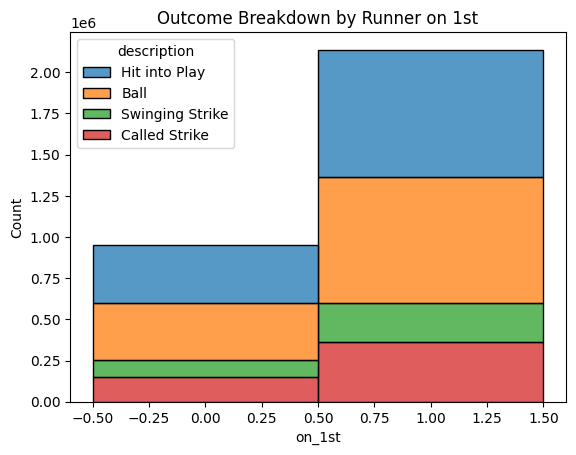

In [12]:
sns.histplot(data=df, x="on_1st", hue="description", multiple="stack", discrete=True)

plt.title("Outcome Breakdown by Runner on 1st")
plt.show()

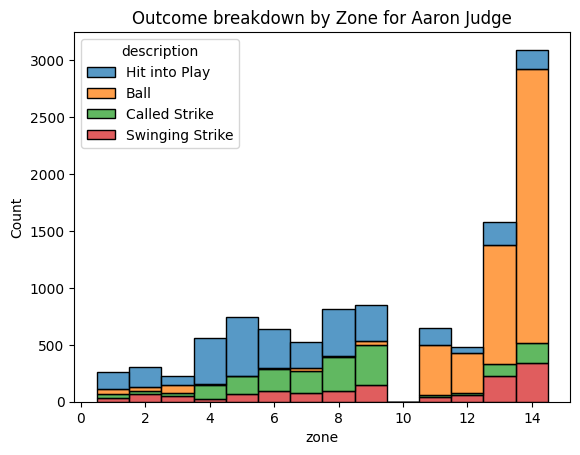

In [13]:
judge_df = df[df["batter"] == 592450]

sns.histplot(data=judge_df, x="zone", hue="description", multiple="stack", discrete=True)

plt.title("Outcome breakdown by Zone for Aaron Judge")
plt.show()

In [14]:
only_fastballs = df[df["pitch_name_4-Seam Fastball"] == True]
only_curveballs = df[df["pitch_name_Curveball"] == True]

only_fastballs

,Unnamed: 0,pitch_id,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,stand,...,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_Sweeper,Batter Side,on_1st,on_2nd,on_3rd,Pitcher Side,description,Swinging
0,0,2909,2020-09-27,91.6,2.31,6.19,605137,543272,1.0,R,...,False,False,False,0,True,True,True,1,Hit into Play,True
6,6,3708,2020-09-27,92.8,2.39,6.27,663647,543272,1.0,R,...,False,False,False,0,True,True,True,1,Hit into Play,True
23,23,4299,2020-09-27,91.3,2.59,5.99,624428,543272,4.0,L,...,False,False,False,1,False,True,True,1,Hit into Play,True
24,24,4449,2020-09-27,92.5,2.43,6.14,624428,543272,11.0,L,...,False,False,False,1,False,True,True,1,Ball,False
25,25,4597,2020-09-27,90.5,2.52,6.02,624428,543272,13.0,L,...,False,False,False,1,False,True,True,1,Called Strike,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086262,3109419,1218,2024-03-20,95.4,-1.89,5.78,669257,506433,14.0,R,...,False,False,False,0,False,True,True,0,Ball,False
3086264,3109421,1374,2024-03-20,95.4,-1.86,5.74,518692,506433,14.0,L,...,False,False,False,1,False,True,True,0,Ball,False
3086270,3109427,1994,2024-03-20,95.7,-2.13,5.77,660271,506433,12.0,L,...,False,False,False,1,False,True,True,0,Ball,False
3086273,3109430,2527,2024-03-20,92.6,-1.94,5.83,605141,506433,3.0,R,...,False,False,False,0,True,True,True,0,Hit into Play,True


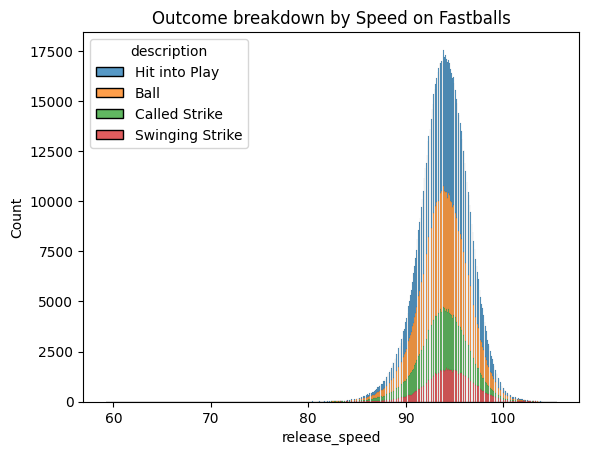

In [15]:
sns.histplot(data=only_fastballs, x="release_speed", hue="description", multiple="stack", discrete=False)

plt.title("Outcome breakdown by Speed on Fastballs")
plt.show()

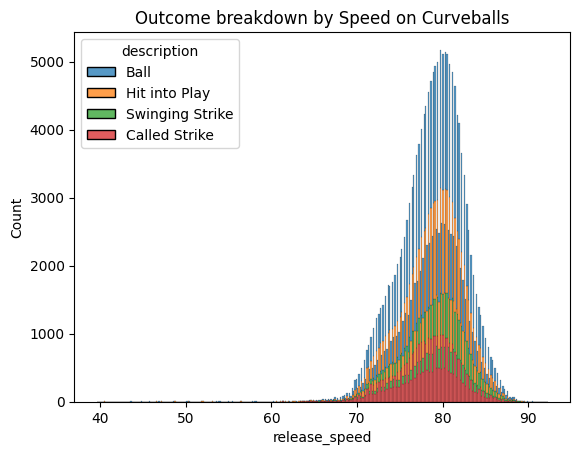

In [16]:
sns.histplot(data=only_curveballs, x="release_speed", hue="description", multiple="stack", discrete=False)

plt.title("Outcome breakdown by Speed on Curveballs")
plt.show()